# 01 - Importação das Bibliotecas

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


# Base Application Data

# 02 - Carregar os dados

In [28]:
data = pd.read_csv('application_data.csv')
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456182,0,Revolving loans,F,N,Y,2,90000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456196,0,Revolving loans,F,N,Y,2,202500.0,360000.0,18000.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0
307508,456207,0,Revolving loans,F,N,Y,0,247500.0,675000.0,33750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456229,0,Revolving loans,F,N,Y,1,270000.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# 03 - 1a Tratativa: Análise de Distribuição

- Antes de decidir como tratar os valores nulos, é importante entender a distribuição das colunas. 
- Plotar histogramas e calcular estatísticas descritivas (média, mediana, desvio padrão, etc.) ajudará a tomar uma decisão formada.


## 03.01 - Colunas com valores numéricos

Análises de Distribuição das colunas de probabilidade AMT_CREDIT, AMT_INCOME_TOTAL, CNT_CHILDREN: 


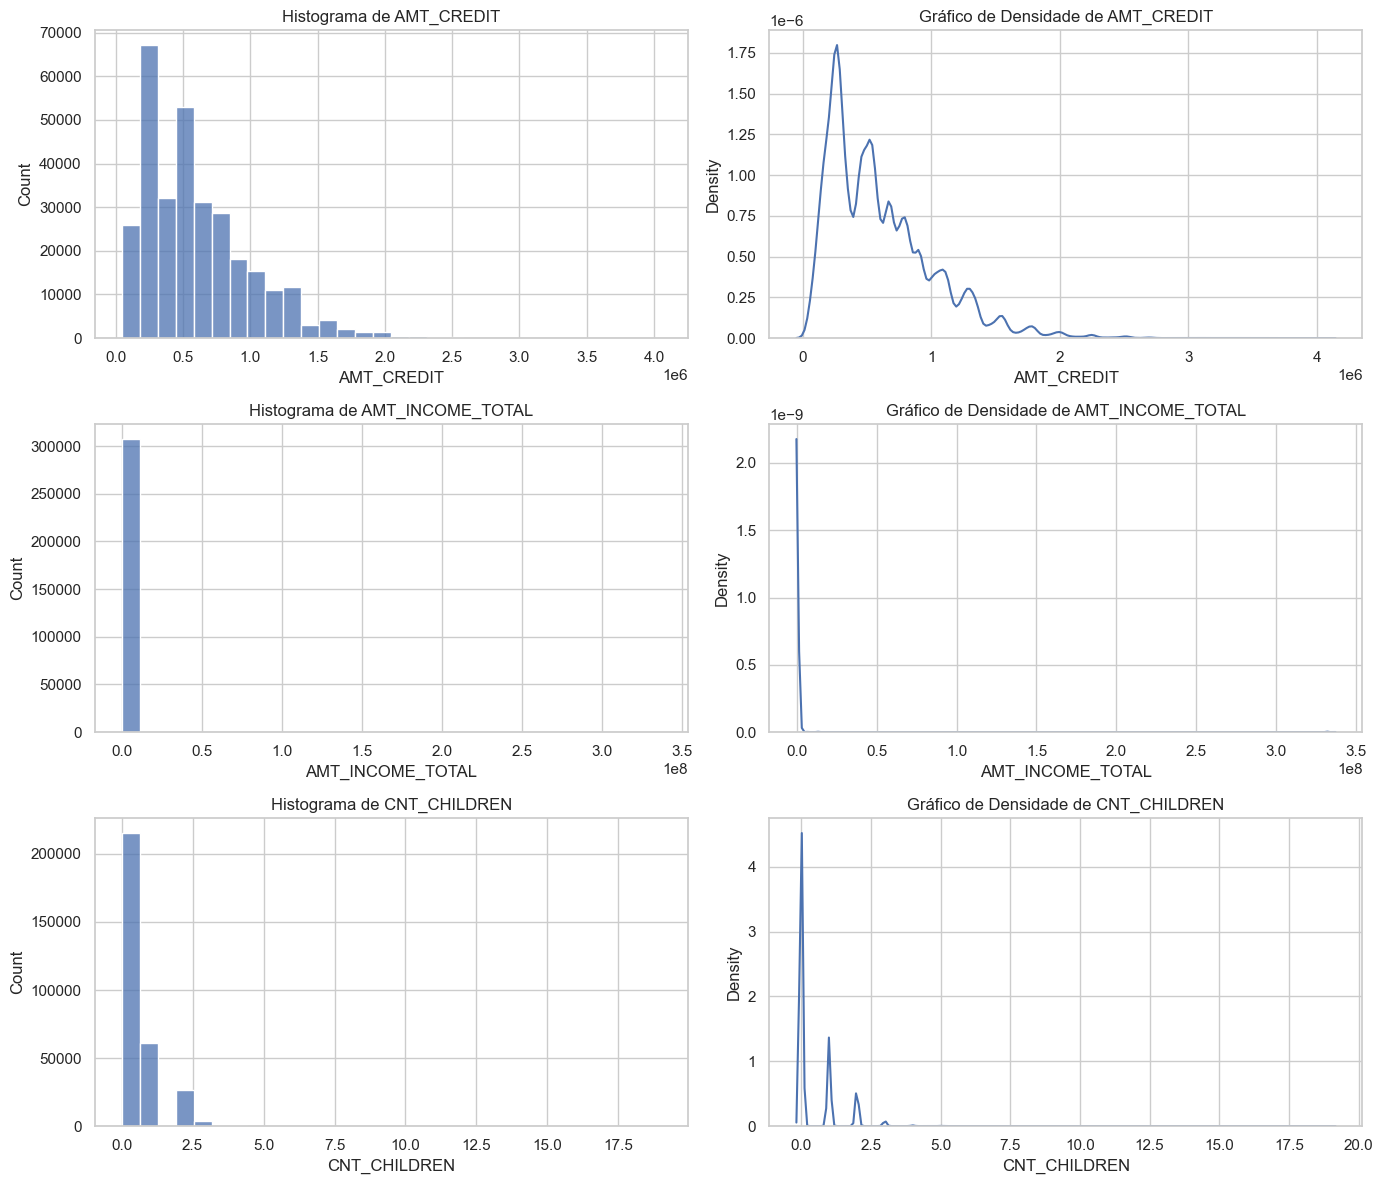

Estatísticas Descritivas: 
         AMT_CREDIT  AMT_INCOME_TOTAL   CNT_CHILDREN
count  3.075110e+05      3.075110e+05  307511.000000
mean   5.990260e+05      1.736934e+05       0.417052
std    4.024908e+05      1.124048e+06       0.722121
min    4.500000e+04      2.565000e+04       0.000000
25%    2.700000e+05      1.125000e+05       0.000000
50%    5.135310e+05      1.471500e+05       0.000000
75%    8.086500e+05      2.025000e+05       1.000000
max    4.050000e+06      3.368359e+08      19.000000
Analisando os dados nulos: 
                  Número de valores nulos  Porcentagem de valores nulos
AMT_CREDIT                              0                           0.0
AMT_INCOME_TOTAL                        0                           0.0
CNT_CHILDREN                            0                           0.0


In [30]:
print('Análises de Distribuição das colunas de probabilidade AMT_CREDIT, AMT_INCOME_TOTAL, CNT_CHILDREN: ')

colunas_selecionadas = [['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN']]

# Configurar estilo do seaborn
sns.set(style="whitegrid")

# Supondo que df seja o DataFrame original
df_01 = data[['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN']]

# Plotar histogramas e gráficos de densidade para verificar a distribuição
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for i, col in enumerate(['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN']):
    # Histograma
    sns.histplot(df_01[col].dropna(), kde=False, bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {col}')
    
    # Gráfico de densidade
    sns.kdeplot(df_01[col].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Gráfico de Densidade de {col}')

plt.tight_layout()
plt.show()

print('Estatísticas Descritivas: ')
print(df_01[['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN']].describe())

print('Analisando os dados nulos: ')

def analisar_dados_nulos(df):
    null_counts = df.isnull().sum()
    null_percentages = 100 * df.isnull().mean()
    null_summary = pd.DataFrame({
        'Número de valores nulos': null_counts,
        'Porcentagem de valores nulos': null_percentages
    })
    print(null_summary)
    
analisar_dados_nulos(df_01)


Análises de Distribuição das colunas de probabilidade CNT_FAM_MEMBERS, DAYS_BIRTH, DAYS_EMPLOYED: 


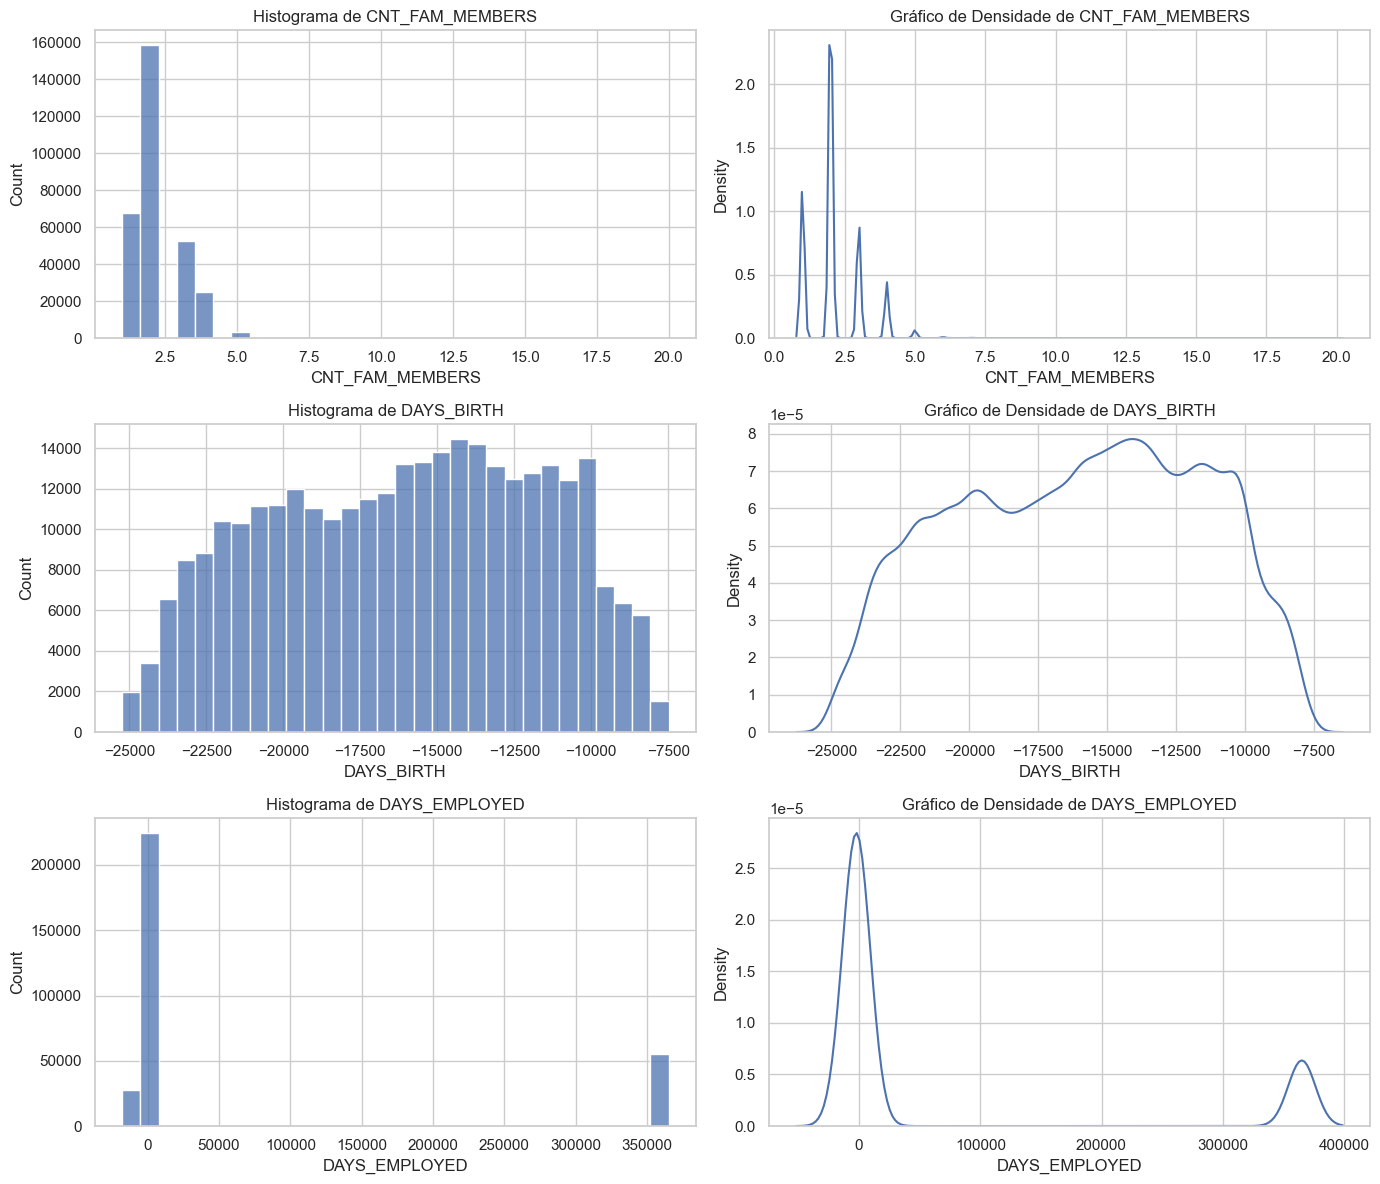

Estatísticas Descritivas: 
       CNT_FAM_MEMBERS     DAYS_BIRTH  DAYS_EMPLOYED
count    307509.000000  307511.000000  307511.000000
mean          2.152665  -16036.995067   63815.045904
std           0.910682    4363.988632  141275.766519
min           1.000000  -25229.000000  -17912.000000
25%           2.000000  -19682.000000   -2760.000000
50%           2.000000  -15750.000000   -1213.000000
75%           3.000000  -12413.000000    -289.000000
max          20.000000   -7489.000000  365243.000000
Analisando os dados nulos: 
                 Número de valores nulos  Porcentagem de valores nulos
CNT_FAM_MEMBERS                        2                       0.00065
DAYS_BIRTH                             0                       0.00000
DAYS_EMPLOYED                          0                       0.00000


In [31]:
print('Análises de Distribuição das colunas de probabilidade CNT_FAM_MEMBERS, DAYS_BIRTH, DAYS_EMPLOYED: ')

# Configurar estilo do seaborn
sns.set(style="whitegrid")

# Supondo que df seja o DataFrame original
df_02 = data[['CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]

# Plotar histogramas e gráficos de densidade para verificar a distribuição
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for i, col in enumerate(['CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED']):
    # Histograma
    sns.histplot(df_02[col].dropna(), kde=False, bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {col}')
    
    # Gráfico de densidade
    sns.kdeplot(df_02[col].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Gráfico de Densidade de {col}')

plt.tight_layout()
plt.show()

print('Estatísticas Descritivas: ')
print(df_02[['CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED']].describe())

print('Analisando os dados nulos: ')
analisar_dados_nulos(df_02)


Análises de Distribuição das colunas de probabilidade EXT_SOURCE_2, AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_REGISTRATION: 


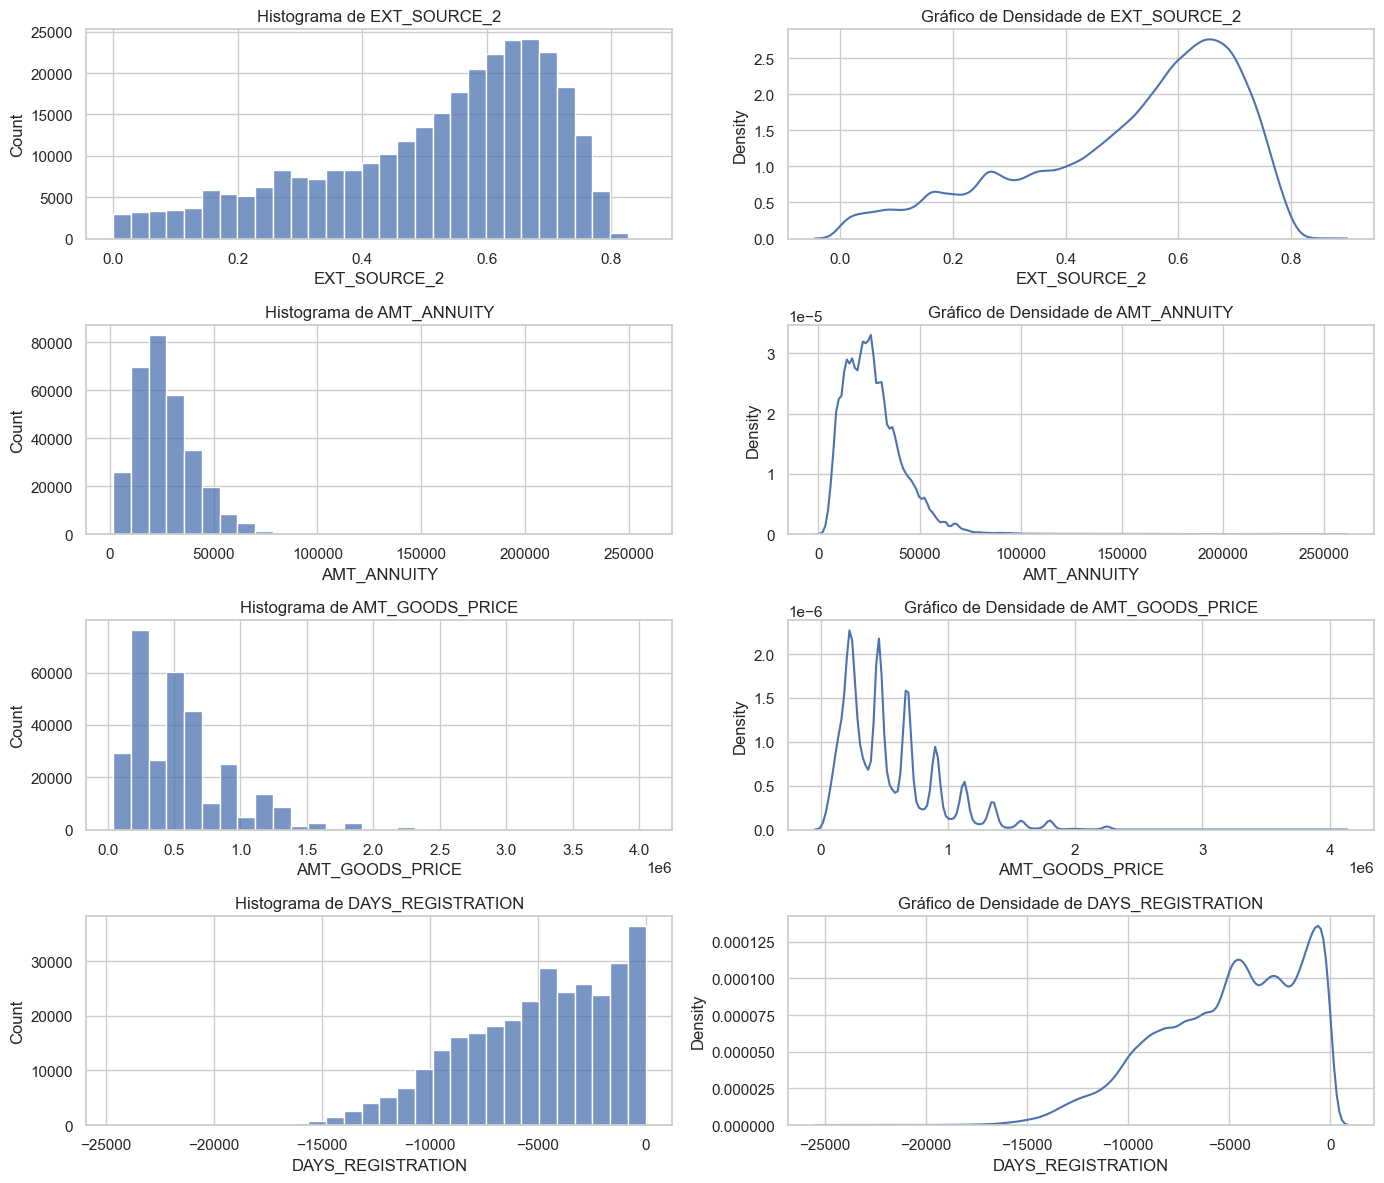

Estatísticas Descritivas: 
       EXT_SOURCE_2    AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_REGISTRATION
count  3.068510e+05  307499.000000     3.072330e+05      307511.000000
mean   5.143927e-01   27108.573909     5.383962e+05       -4986.120328
std    1.910602e-01   14493.737315     3.694465e+05        3522.886321
min    8.173617e-08    1615.500000     4.050000e+04      -24672.000000
25%    3.924574e-01   16524.000000     2.385000e+05       -7479.500000
50%    5.659614e-01   24903.000000     4.500000e+05       -4504.000000
75%    6.636171e-01   34596.000000     6.795000e+05       -2010.000000
max    8.549997e-01  258025.500000     4.050000e+06           0.000000
Analisando os dados nulos: 
                   Número de valores nulos  Porcentagem de valores nulos
EXT_SOURCE_2                           660                      0.214626
AMT_ANNUITY                             12                      0.003902
AMT_GOODS_PRICE                        278                      0.090403
DAYS_REGISTRAT

In [32]:
print('Análises de Distribuição das colunas de probabilidade EXT_SOURCE_2, AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_REGISTRATION: ')

# Configurar estilo do seaborn
sns.set(style="whitegrid")

# Supondo que df seja o DataFrame original
df_03 = data[['EXT_SOURCE_2','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION']]

# Plotar histogramas e gráficos de densidade para verificar a distribuição
fig, axes = plt.subplots(4, 2, figsize=(14, 12))

for i, col in enumerate(['EXT_SOURCE_2','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION']):
    # Histograma
    sns.histplot(df_03[col].dropna(), kde=False, bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {col}')
    
    # Gráfico de densidade
    sns.kdeplot(df_03[col].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Gráfico de Densidade de {col}')

plt.tight_layout()
plt.show()

print('Estatísticas Descritivas: ')
print(df_03[['EXT_SOURCE_2','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION']].describe())

print('Analisando os dados nulos: ')
analisar_dados_nulos(df_03)

Análises de Distribuição das colunas de probabilidade FLAG_PHONE, REGION_RATING_CLIENT: 


C:\Users\amand\AppData\Local\Temp\ipykernel_13204\1427837111.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], order=value_counts.index, palette="pastel")
C:\Users\amand\AppData\Local\Temp\ipykernel_13204\1427837111.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], order=value_counts.index, palette="pastel")


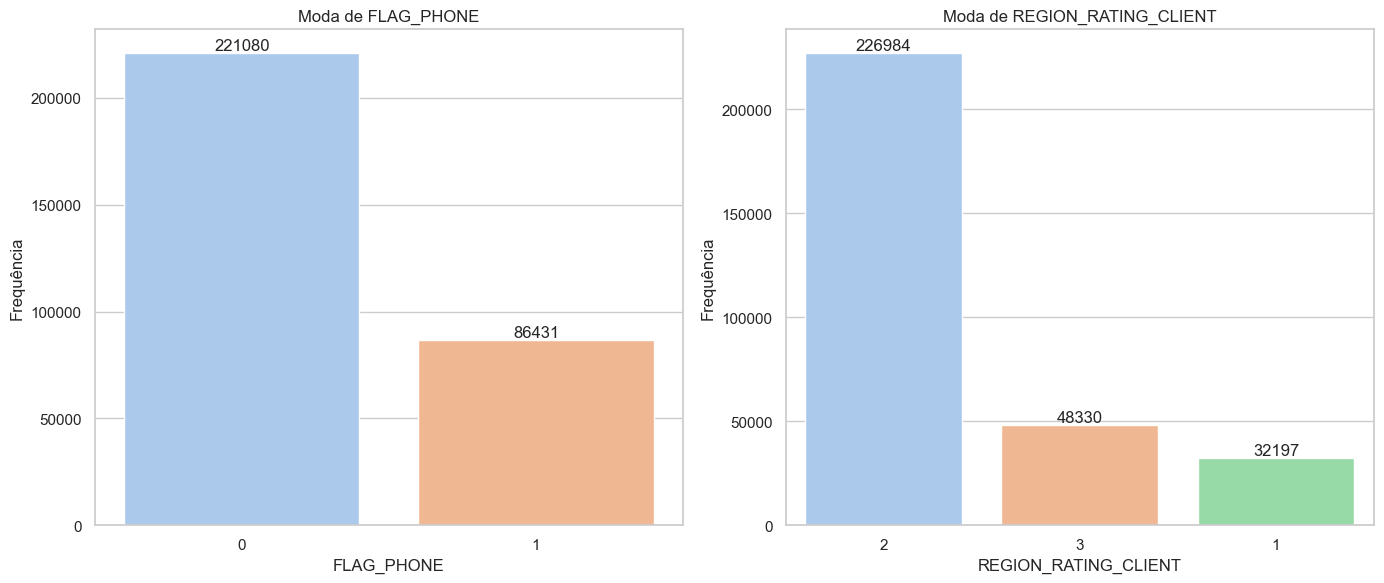

Estatísticas Descritivas: 
          FLAG_PHONE  REGION_RATING_CLIENT
count  307511.000000         307511.000000
mean        0.281066              2.052463
std         0.449521              0.509034
min         0.000000              1.000000
25%         0.000000              2.000000
50%         0.000000              2.000000
75%         1.000000              2.000000
max         1.000000              3.000000
Analisando os dados nulos: 
                      Número de valores nulos  Porcentagem de valores nulos
FLAG_PHONE                                  0                           0.0
REGION_RATING_CLIENT                        0                           0.0


In [33]:
print('Análises de Distribuição das colunas de probabilidade FLAG_PHONE, REGION_RATING_CLIENT: ')

# Configurar estilo do seaborn e paleta de cores
sns.set(style="whitegrid", palette="pastel") 

# Supondo que df seja o DataFrame original
df_05 = data[['FLAG_PHONE','REGION_RATING_CLIENT']]

# Plotar gráficos de barras para verificar a moda
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Ajustar o tamanho da figura

for i, col in enumerate(['FLAG_PHONE','REGION_RATING_CLIENT']):
    value_counts = df_05[col].value_counts().sort_values(ascending=False)
    
    # Gráfico de barras com paleta de cores pastel
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], order=value_counts.index, palette="pastel")
    axes[i].set_title(f'Moda de {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Frequência')
    
    # Adicionar legendas em cada barra
    for index, value in enumerate(value_counts):
        axes[i].text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print('Estatísticas Descritivas: ')
print(df_05.describe())

print('Analisando os dados nulos: ')

def analisar_dados_nulos(df):
    null_counts = df.isnull().sum()
    null_percentages = 100 * df.isnull().mean()
    null_summary = pd.DataFrame({
        'Número de valores nulos': null_counts,
        'Porcentagem de valores nulos': null_percentages
    })
    print(null_summary)

analisar_dados_nulos(df_05)


Análises de Distribuição das colunas de probabilidade TARGET: 


C:\Users\amand\AppData\Local\Temp\ipykernel_13204\690706022.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes, order=value_counts.index, palette="pastel")


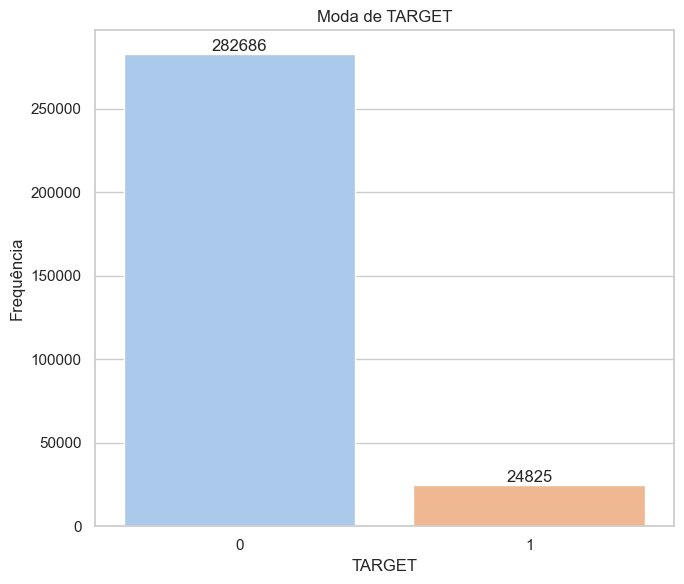

Estatísticas Descritivas: 
              TARGET
count  307511.000000
mean        0.080729
std         0.272419
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Analisando os dados nulos: 
        Número de valores nulos  Porcentagem de valores nulos
TARGET                        0                           0.0


In [34]:
print('Análises de Distribuição das colunas de probabilidade TARGET: ')

# Configurar estilo do seaborn e paleta de cores
sns.set(style="whitegrid", palette="pastel")

# Supondo que df seja o DataFrame original
df_06 = data[['TARGET']]

# Plotar gráfico de barras para verificar a moda
fig, axes = plt.subplots(1, 1, figsize=(7, 6))  # Ajustar o tamanho da figura

# Calcular a moda e plotar o gráfico de barras
value_counts = df_06['TARGET'].value_counts().sort_values(ascending=False)

# Gráfico de barras com paleta de cores pastel
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes, order=value_counts.index, palette="pastel")
axes.set_title(f'Moda de TARGET')
axes.set_xlabel('TARGET')
axes.set_ylabel('Frequência')

# Adicionar legendas em cada barra
for index, value in enumerate(value_counts):
    axes.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print('Estatísticas Descritivas: ')
print(df_06.describe())

print('Analisando os dados nulos: ')

def analisar_dados_nulos(df):
    null_counts = df.isnull().sum()
    null_percentages = 100 * df.isnull().mean()
    null_summary = pd.DataFrame({
        'Número de valores nulos': null_counts,
        'Porcentagem de valores nulos': null_percentages
    })
    print(null_summary)

analisar_dados_nulos(df_06)


## 03.02 - Colunas com valores categóricos (texto)

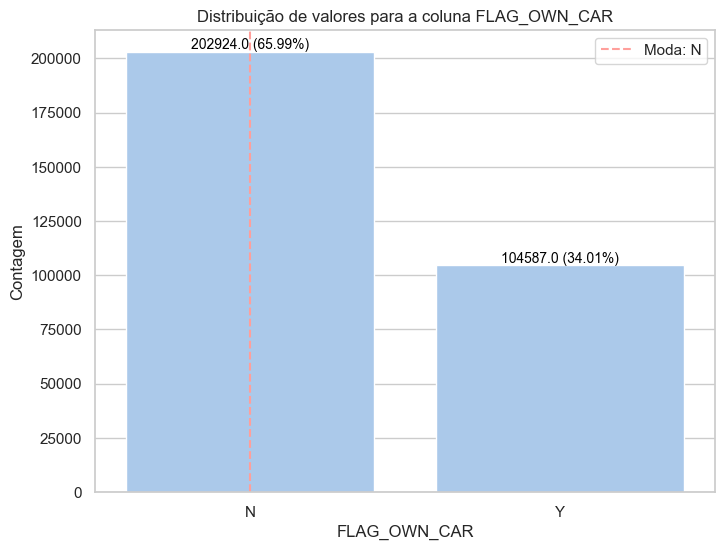

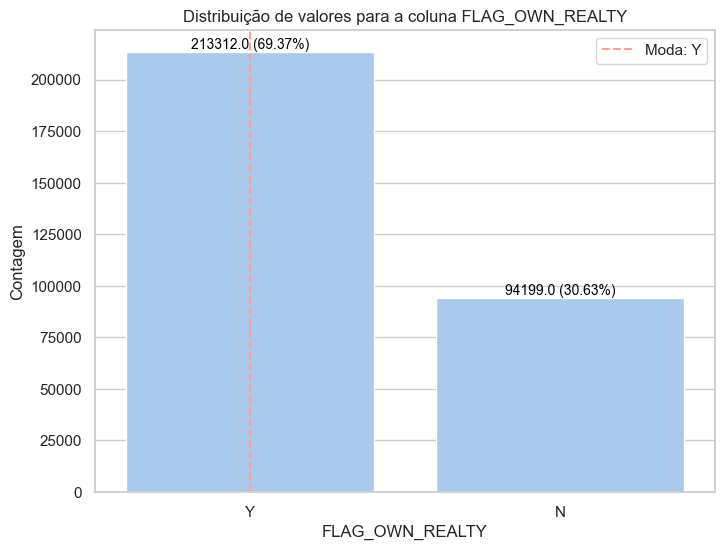

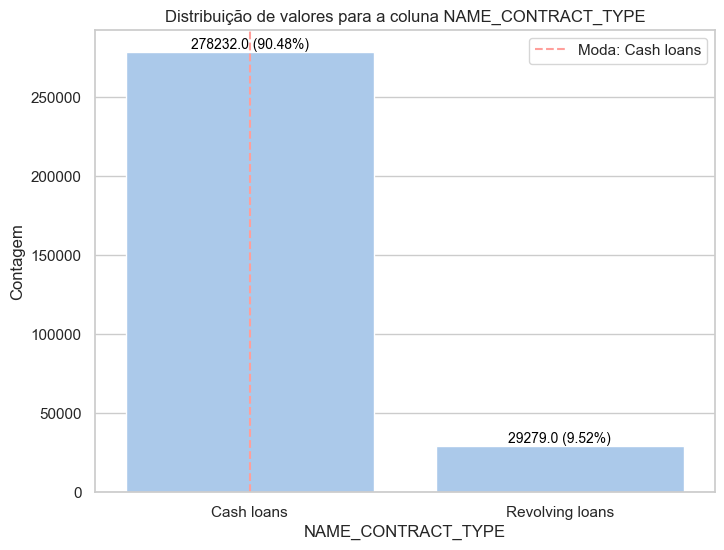

Estatísticas Descritivas: 
       FLAG_OWN_CAR FLAG_OWN_REALTY NAME_CONTRACT_TYPE
count        307511          307511             307511
unique            2               2                  2
top               N               Y         Cash loans
freq         202924          213312             278232
Analisando os dados nulos: 
                    Número de valores nulos  Porcentagem de valores nulos
FLAG_OWN_CAR                              0                           0.0
FLAG_OWN_REALTY                           0                           0.0
NAME_CONTRACT_TYPE                        0                           0.0


In [35]:
# Configurar estilo do seaborn e paleta de cores
sns.set(style="whitegrid", palette="pastel")

df_07 = data[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_CONTRACT_TYPE']]

# Plotando gráfico de barras para cada coluna
for coluna in df_07.columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df_07, x=coluna)
    plt.title(f'Distribuição de valores para a coluna {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    
    # Adicionando contagens nos gráficos
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height() / len(df_07) * 100:.2f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    # Calculando a moda
    moda = df_07[coluna].mode()[0]
    plt.axvline(x=moda, color='r', linestyle='--', label=f'Moda: {moda}')
    plt.legend()
    
    plt.show()

print('Estatísticas Descritivas: ')
print(df_07.describe())

print('Analisando os dados nulos: ')
analisar_dados_nulos(df_07)

# transformacao de texto binario - funcao dummy

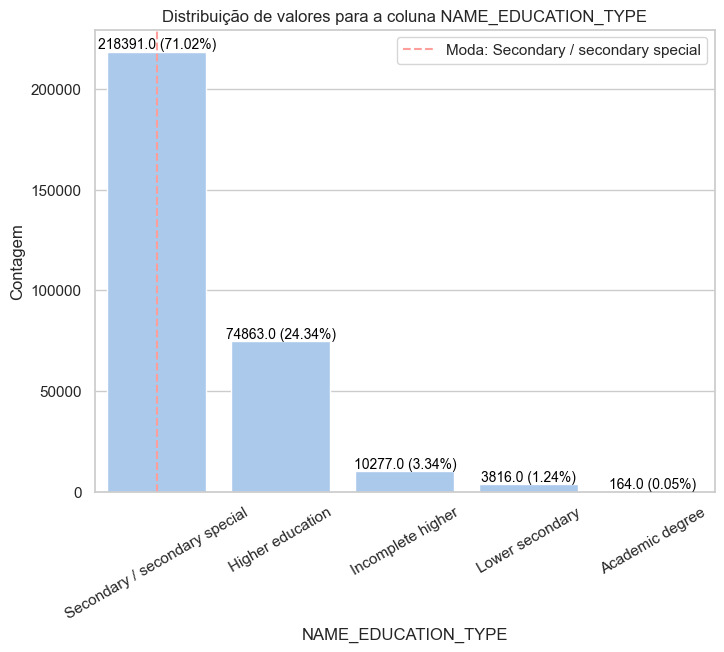

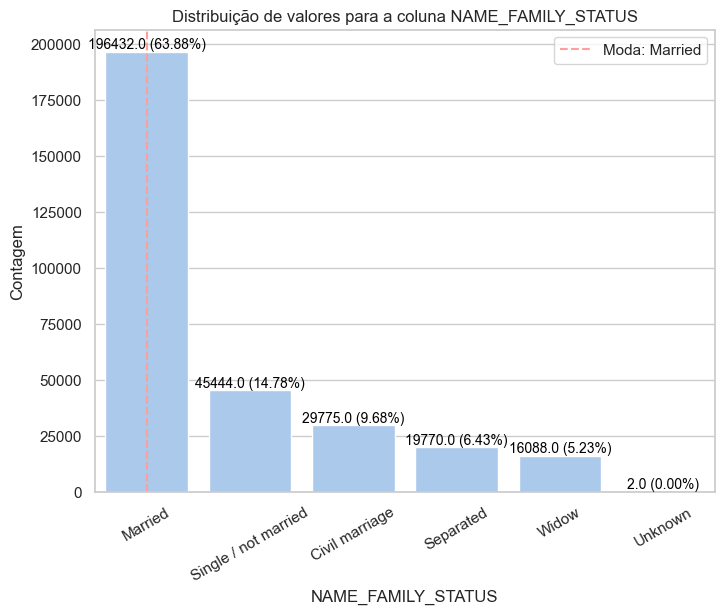

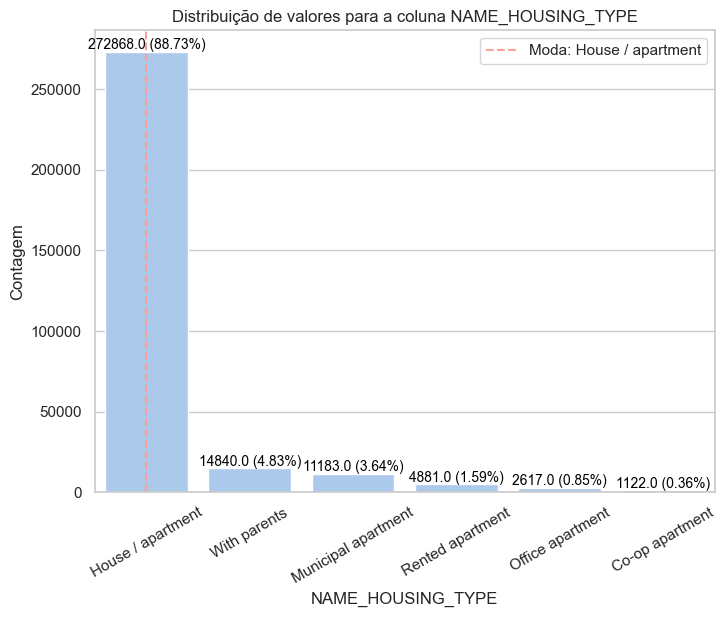

Estatísticas Descritivas: 
                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE
count                          307511             307511             307511
unique                              5                  6                  6
top     Secondary / secondary special            Married  House / apartment
freq                           218391             196432             272868
Analisando os dados nulos: 
                     Número de valores nulos  Porcentagem de valores nulos
NAME_EDUCATION_TYPE                        0                           0.0
NAME_FAMILY_STATUS                         0                           0.0
NAME_HOUSING_TYPE                          0                           0.0


In [36]:
# Configurar estilo do seaborn e paleta de cores
sns.set(style="whitegrid", palette="pastel")

df_08 = data[['NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']]

# Função para ordenar os dados de uma coluna
def ordenar_dados(coluna):
    contagem = df_08[coluna].value_counts().sort_values(ascending=False)
    return contagem

# Plotando gráfico de barras para cada coluna
for coluna in df_08.columns:
    plt.figure(figsize=(8, 6))
    
    # Ordenar dados
    contagem = ordenar_dados(coluna)
    ordem = contagem.index
    
    ax = sns.countplot(data=df_08, x=coluna, order=ordem)
    plt.title(f'Distribuição de valores para a coluna {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    
    # Adicionando contagens nos gráficos
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height() / len(df_08) * 100:.2f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    # Calculando a moda
    moda = df_08[coluna].mode()[0]
    plt.axvline(x=moda, color='r', linestyle='--', label=f'Moda: {moda}')
    plt.legend()
    
    # Rotacionando levemente as legendas do eixo x
    plt.xticks(rotation=30)
    plt.show()

print('Estatísticas Descritivas: ')
print(df_08.describe())

print('Analisando os dados nulos: ')
analisar_dados_nulos(df_08)

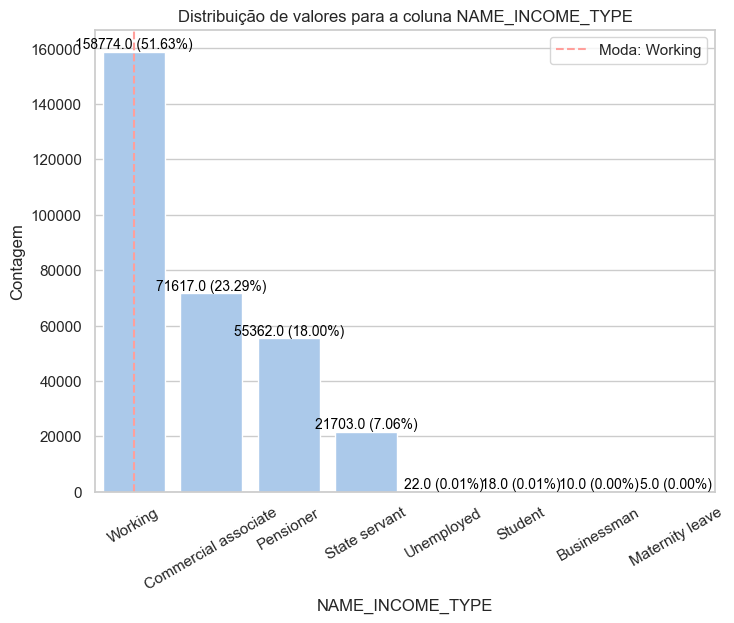

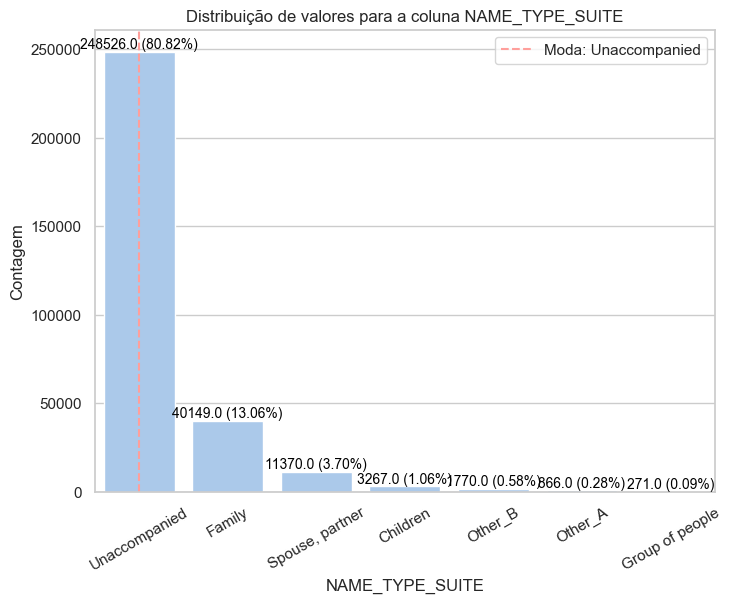

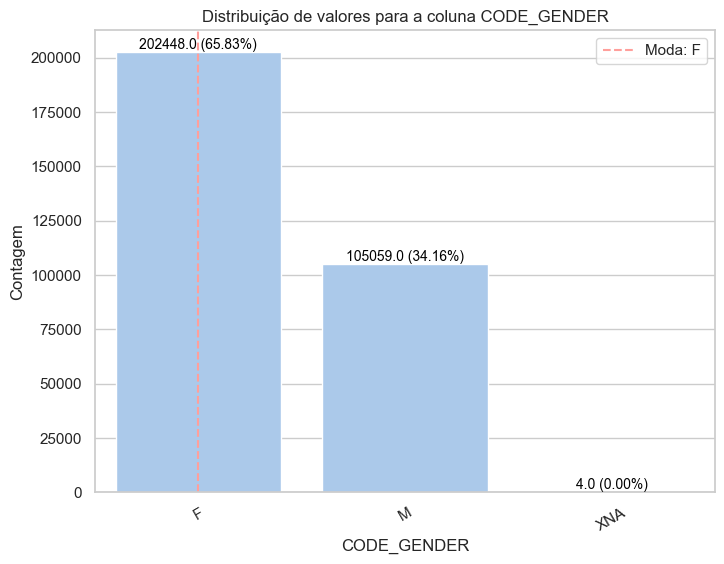

Estatísticas Descritivas: 
       NAME_INCOME_TYPE NAME_TYPE_SUITE CODE_GENDER
count            307511          306219      307511
unique                8               7           3
top             Working   Unaccompanied           F
freq             158774          248526      202448
Analisando os dados nulos: 
                  Número de valores nulos  Porcentagem de valores nulos
NAME_INCOME_TYPE                        0                      0.000000
NAME_TYPE_SUITE                      1292                      0.420148
CODE_GENDER                             0                      0.000000


In [38]:
# Configurar estilo do seaborn e paleta de cores
sns.set(style="whitegrid", palette="pastel")

df_09 = data[['NAME_INCOME_TYPE', 'NAME_TYPE_SUITE','CODE_GENDER']]

# Função para ordenar os dados de uma coluna
def ordenar_dados(coluna):
    contagem = df_09[coluna].value_counts().sort_values(ascending=False)
    return contagem

# Plotando gráfico de barras para cada coluna
for coluna in df_09.columns:
    plt.figure(figsize=(8, 6))
    
    # Ordenar dados
    contagem = ordenar_dados(coluna)
    ordem = contagem.index
    
    ax = sns.countplot(data=df_09, x=coluna, order=ordem)
    plt.title(f'Distribuição de valores para a coluna {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    
    # Adicionando contagens nos gráficos
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height() / len(df_09) * 100:.2f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    # Calculando a moda
    moda = df_09[coluna].mode()[0]
    plt.axvline(x=moda, color='r', linestyle='--', label=f'Moda: {moda}')
    plt.legend()
    
    # Rotacionando levemente as legendas do eixo x
    plt.xticks(rotation=30)
    plt.show()

print('Estatísticas Descritivas: ')
print(df_09.describe())

print('Analisando os dados nulos: ')
analisar_dados_nulos(df_09)


In [ ]:
nums = ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN','CNT_FAM_MEMBERS',
        'DAYS_BIRTH', 'DAYS_EMPLOYED','EXT_SOURCE_2','AMT_ANNUITY', 
        'AMT_GOODS_PRICE', 'DAYS_REGISTRATION','FLAG_PHONE',
        'REGION_RATING_CLIENT','TARGET']

text = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_CONTRACT_TYPE',
        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
        'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE','CODE_GENDER']

todas_as_columns = ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN','CNT_FAM_MEMBERS',
    'DAYS_BIRTH', 'DAYS_EMPLOYED','EXT_SOURCE_2','AMT_ANNUITY', 'AMT_GOODS_PRICE', 
    'DAYS_REGISTRATION','FLAG_PHONE','REGION_RATING_CLIENT','TARGET','FLAG_OWN_CAR', 
    'FLAG_OWN_REALTY','NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE','NAME_INCOME_TYPE', 'NAME_TYPE_SUITE','CODE_GENDER']


In [ ]:
# NULOS

# NAME_TYPE_SUITE -> 0.42% (STR)

# EXT_SOURCE_2 -> 0.215 (NUM)
# AMT_ANNUITY -> 0.003 (NUM)
# AMT_GOODS_PRICE -> 0.090 (NUM)
# CNT_FAM_MEMBERS -> 0.00065 (NUM)

# 04 - 2a Tratativa: Limpeza e Pré-processamento dos Dados

In [40]:
colunas_selecionadas = [
    'SK_ID_CURR',
    'AMT_CREDIT', 
    'AMT_INCOME_TOTAL', 
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS',
    'DAYS_BIRTH', 
    'DAYS_EMPLOYED',
    'EXT_SOURCE_2',
    'AMT_ANNUITY', 
    'AMT_GOODS_PRICE', 
    'DAYS_REGISTRATION',
    'FLAG_PHONE',
    'REGION_RATING_CLIENT',
    'TARGET',
    'FLAG_OWN_CAR', 
    'FLAG_OWN_REALTY',
    'NAME_CONTRACT_TYPE',
    'NAME_EDUCATION_TYPE', 
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'NAME_INCOME_TYPE', 
    'NAME_TYPE_SUITE',
    'CODE_GENDER'
] # 23 colunas

df_tratamento = data[colunas_selecionadas]

# Definindo as colunas que têm linhas nulas
colunas_com_nulos = ['NAME_TYPE_SUITE', 'EXT_SOURCE_2', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']

# Removendo linhas nulas apenas nas colunas especificadas
df_tratamento_sem_nulos = df_tratamento.dropna(subset=colunas_com_nulos)

# Verificando o tamanho do DataFrame após a remoção das linhas nulas
print("Número de linhas antes da remoção de linhas nulas:", len(df_tratamento))
print("Número de linhas após a remoção de linhas nulas:", len(df_tratamento_sem_nulos))


Número de linhas antes da remoção de linhas nulas: 307511
Número de linhas após a remoção de linhas nulas: 305548


In [43]:
df_tratamento_sem_nulos.dtypes

sk_id_curr                   int64
amt_credit                 float64
amt_income_total           float64
cnt_children                 int64
cnt_fam_members            float64
days_birth                   int64
days_employed                int64
ext_source_2               float64
amt_annuity                float64
amt_goods_price            float64
days_registration          float64
flag_phone                   int64
region_rating_client         int64
target                       int64
name_education_type         object
name_family_status          object
name_housing_type           object
name_income_type            object
name_type_suite             object
code_gender_f                 bool
code_gender_m                 bool
code_gender_xna               bool
flag_car_n                    bool
flag_car_y                    bool
flag_realty_n                 bool
flag_realty_y                 bool
contract_type_cash            bool
contract_type_revolving       bool
dtype: object

## Ajustando a base para o modelo estatistico

In [41]:
# Coluna CODE_GENDER
df_dummies_gender = pd.get_dummies(df_tratamento_sem_nulos['CODE_GENDER'], prefix='CODE_GENDER')
df_tratamento_sem_nulos = pd.concat([df_tratamento_sem_nulos, df_dummies_gender], axis=1)

# Coluna FLAG_OWN_CAR
df_dummies_car = pd.get_dummies(df_tratamento_sem_nulos['FLAG_OWN_CAR'], prefix='FLAG_CAR')
df_tratamento_sem_nulos = pd.concat([df_tratamento_sem_nulos, df_dummies_car], axis=1)

# Coluna FLAG_OWN_REALTY
df_dummies_realty = pd.get_dummies(df_tratamento_sem_nulos['FLAG_OWN_REALTY'], prefix='FLAG_REALTY')
df_tratamento_sem_nulos = pd.concat([df_tratamento_sem_nulos, df_dummies_realty], axis=1)

# Coluna NAME_CONTRACT_TYPE
df_dummies_contract = pd.get_dummies(df_tratamento_sem_nulos['NAME_CONTRACT_TYPE'], prefix='CONTRACT_TYPE')
df_tratamento_sem_nulos = pd.concat([df_tratamento_sem_nulos, df_dummies_contract], axis=1)

# Excluir a coluna original (opcional)
df_tratamento_sem_nulos.drop(columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_CONTRACT_TYPE'], inplace=True)

rename_dict = {
    'CONTRACT_TYPE_Cash loans': 'CONTRACT_TYPE_Cash',
    'CONTRACT_TYPE_Revolving loans': 'CONTRACT_TYPE_Revolving'
}

# Renomear as colunas e converter para letras minusculas
df_tratamento_sem_nulos.rename(columns=rename_dict, inplace=True)
df_tratamento_sem_nulos.columns = df_tratamento_sem_nulos.columns.str.lower()
df_tratamento_sem_nulos

,sk_id_curr,amt_credit,amt_income_total,cnt_children,cnt_fam_members,days_birth,days_employed,ext_source_2,amt_annuity,amt_goods_price,...,name_type_suite,code_gender_f,code_gender_m,code_gender_xna,flag_car_n,flag_car_y,flag_realty_n,flag_realty_y,contract_type_cash,contract_type_revolving
0,100002,406597.5,202500.0,0,1.0,-9461,-637,0.262949,24700.5,351000.0,...,Unaccompanied,False,True,False,True,False,False,True,True,False
1,100003,1293502.5,270000.0,0,2.0,-16765,-1188,0.622246,35698.5,1129500.0,...,Family,True,False,False,True,False,True,False,True,False
2,100006,312682.5,135000.0,0,2.0,-19005,-3039,0.650442,29686.5,297000.0,...,Unaccompanied,True,False,False,True,False,False,True,True,False
3,100007,513000.0,121500.0,0,1.0,-19932,-3038,0.322738,21865.5,513000.0,...,Unaccompanied,False,True,False,True,False,False,True,True,False
4,100008,490495.5,99000.0,0,2.0,-16941,-1588,0.354225,27517.5,454500.0,...,"Spouse, partner",False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456182,270000.0,90000.0,2,4.0,-13959,-2190,0.452707,13500.0,270000.0,...,Unaccompanied,True,False,False,True,False,False,True,False,True
307507,456196,360000.0,202500.0,2,4.0,-12778,-3582,0.680098,18000.0,360000.0,...,Unaccompanied,True,False,False,True,False,False,True,False,True
307508,456207,675000.0,247500.0,0,2.0,-18008,-1296,0.724419,33750.0,675000.0,...,Unaccompanied,True,False,False,True,False,False,True,False,True
307509,456229,180000.0,270000.0,1,2.0,-11973,-670,0.702403,9000.0,180000.0,...,Family,True,False,False,True,False,False,True,False,True


In [42]:
df_tratamento_sem_nulos.dtypes

sk_id_curr                   int64
amt_credit                 float64
amt_income_total           float64
cnt_children                 int64
cnt_fam_members            float64
days_birth                   int64
days_employed                int64
ext_source_2               float64
amt_annuity                float64
amt_goods_price            float64
days_registration          float64
flag_phone                   int64
region_rating_client         int64
target                       int64
name_education_type         object
name_family_status          object
name_housing_type           object
name_income_type            object
name_type_suite             object
code_gender_f                 bool
code_gender_m                 bool
code_gender_xna               bool
flag_car_n                    bool
flag_car_y                    bool
flag_realty_n                 bool
flag_realty_y                 bool
contract_type_cash            bool
contract_type_revolving       bool
dtype: object

## Modelagem: Arvore de Decisao

In [44]:
# 2. Divisão do Conjunto de Dados
# Dividimos os dados em conjuntos de treino e teste para treinar e avaliar os modelos.

# Separar as features (X) e o target (y)
X = df_tratamento_sem_nulos.drop(columns=['target'])
y = df_tratamento_sem_nulos['target']

# Transformar variáveis categóricas em variáveis dummy
X = pd.get_dummies(X)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# 3. Treinamento de um Modelo de Árvore de Decisão
# Treinamos uma Árvore de Decisão usando DecisionTreeClassifier do Scikit-learn.
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
# 4. Treinamento de um Modelo de Random Forest
# Treinamos um Random Forest usando RandomForestClassifier do Scikit-learn.
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_test

84095     0
255477    0
288912    0
228805    0
135566    0
         ..
238092    0
80092     0
76294     1
135021    0
174932    1
Name: target, Length: 61110, dtype: int64

Decision Tree Model Evaluation
Accuracy: 0.8489
ROC AUC: 0.5260


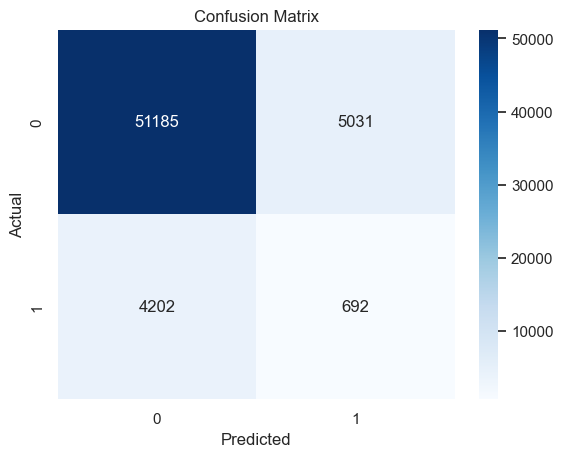

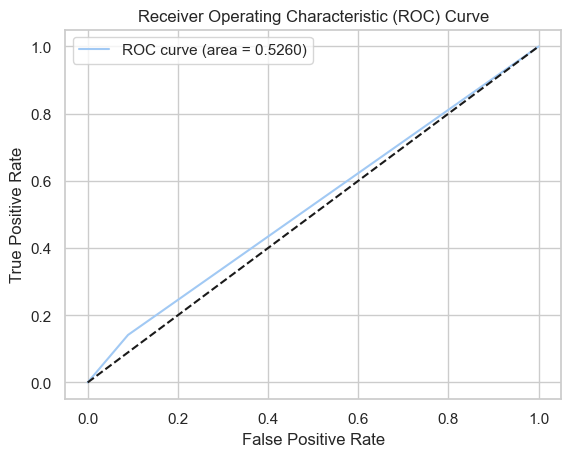

Random Forest Model Evaluation
Accuracy: 0.9200
ROC AUC: 0.6763


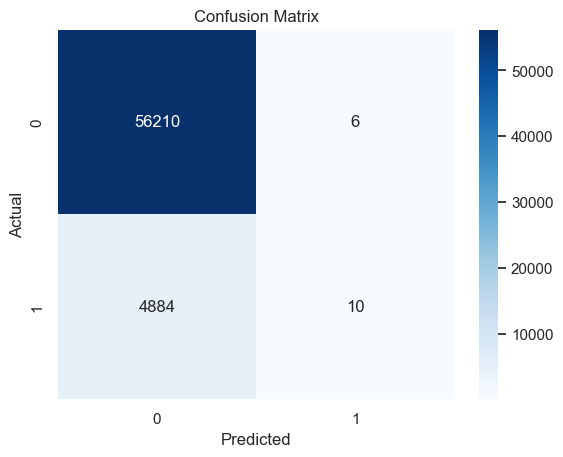

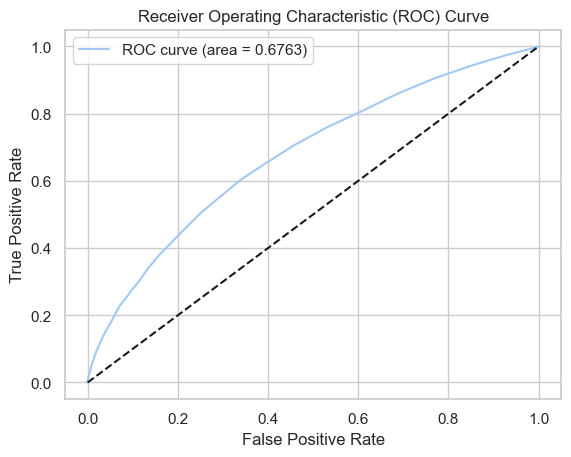

In [48]:
# 5. Avaliação dos Modelos
# Avaliamos os modelos usando métricas como Acurácia, Matriz de Confusão, ROC-AUC, etc.
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    print(f'Accuracy: {acc:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='best')
    plt.show()

print("Decision Tree Model Evaluation")
evaluate_model(dt_clf, X_test, y_test)

print("Random Forest Model Evaluation")
evaluate_model(rf_clf, X_test, y_test)

In [ ]:
# 6. Ajuste de Hiperparâmetros
# Utilizamos a busca em grade (GridSearchCV) para encontrar os melhores hiperparâmetros para os modelos.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_rf_clf = grid_search.best_estimator_

print("Best Random Forest Model Evaluation")
evaluate_model(best_rf_clf, X_test, y_test)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [ ]:
# 7. Visualização dos Resultados
# Visualizamos a importância das características e as métricas de desempenho dos modelos.
# Importância das características
importances = best_rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(15, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Analises Extras

1. **Análise de perfil demográfico e financeiro dos clientes fraudulentos:** Quais são as características demográficas e financeiras mais comuns entre os clientes que cometeram fraude? Isso inclui idade, renda, número de membros da família, tipo de habitação, tipo de renda, entre outros.

2. **Análise da relação entre variáveis financeiras e ocorrência de fraude:** Existe alguma relação entre variáveis financeiras, como o valor do crédito solicitado, renda total, e a ocorrência de fraude? Quais são os padrões observados nas variáveis financeiras entre os clientes fraudulentos em comparação com os clientes não fraudulentos?

3. **Tempo de emprego e fraude:** Existe alguma relação entre o tempo de emprego dos clientes e a ocorrência de fraude? Os clientes com menos tempo de emprego são mais propensos a cometer fraude?

4. **Relação entre as fontes externas de pontuação (EXT_SOURCE) e fraude:** As pontuações externas, como a `ext_source_2`, têm alguma correlação com a ocorrência de fraude? Clientes com pontuações externas mais baixas são mais propensos a cometer fraude?

5. **Padrões de registro e fraude:** Existe alguma diferença nos padrões de registro (por exemplo, dias de registro desde a última atualização) entre os clientes fraudulentos e não fraudulentos?

6. **Padrões de comunicação e fraude:** Os clientes fraudulentos têm padrões de comunicação diferentes, como ter telefone, em comparação com os clientes não fraudulentos?

7. **Tipo de contrato e fraude:** Existe alguma associação entre o tipo de contrato de empréstimo e a ocorrência de fraude? Os clientes que optam por um tipo específico de contrato são mais propensos a cometer fraude?

Essas são apenas algumas das muitas questões que podem ser exploradas para entender melhor a questão da fraude bancária neste conjunto de dados. Cada uma dessas questões pode ser investigada utilizando técnicas de visualização de dados, análise estatística e modelagem preditiva.